In [1]:
import pandas as pd
import glob
import cv2
import numpy as np
import tensorflow as tf
from  tensorflow.keras import layers 

In [2]:
positive_arr=[]
negative_arr=[]

In [3]:
positive_path = glob.glob("./archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/*.jpg")
for img in positive_path:
    # print(img.split('\\')[1])
    positive_arr.append(cv2.resize(cv2.imread(img), (100,100)))
len(positive_path)

134

In [4]:
Negative_path = glob.glob("./archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/*.jpg")
for img in Negative_path:
    # print(img.split('\\')[1])
    negative_arr.append(cv2.resize(cv2.imread(img), (100,100)))    
len(Negative_path)
len(positive_path)+len(Negative_path)

520

In [10]:
print(len(positive_arr),len(negative_arr))

134 386


In [11]:

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='softmax'))


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 100)       2800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 200)       180200    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 200)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 200)       360200    
_________________________________________________________________
flatten_1 (Flatten)          (None, 88200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [13]:
  lables=[0 for i in range(len(negative_arr))]
  lables.extend( [1 for i in range(len(positive_arr))] ) 
  len(lables)

520

In [15]:
history = model.fit(np.array(negative_arr + positive_arr),np.array(lables), epochs=100 )

Epoch 1/100
17/17 [==============================] - 1s 77ms/step - loss: nan - accuracy: 0.7423
Epoch 2/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 3/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 4/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 5/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 6/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 7/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 8/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 9/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 10/100
17/17 [==============================] - 1s 76ms/step - loss: nan - accuracy: 0.7423
Epoch 11/100
17/17 [=========

In [23]:
# plot feature map of first conv layer for given image
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG19()
# redefine model to output right after the first hidden layer

574717952/574710816 [==============================] - 163s 0us/step


In [24]:
model = keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [28]:
# load the image with the required shape
file = tf.keras.utils.get_file("Fundus-Photography-What-You-Need-to-Know-10.width-500.png",
"https://covalentcareers3.s3-accelerate.amazonaws.com/media/images/Fundus-Photography-What-You-Need-to-Know-10.width-500.png")
img = load_img(file, target_size=(224, 224))
# convert the image to an array


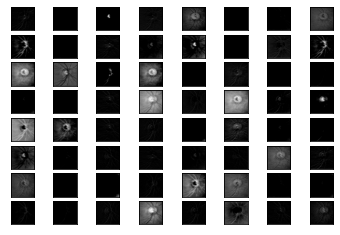

In [29]:
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [30]:
ax.figure.savefig("feture_vgg19")